### 분류
- 회귀 (예측) <- 전 시간까지 쭉 배워왔던 것
- 분류의 대표적인 것을 배울 예정
- 로지스틱 회귀


- 분류는 범주형 값에 대해서 예측하는 경우 (흔히 말하는 0, 1 이진 분류, 다중 분류도 될 수 있음)
- 예측할 값이 회귀와는 다르게 연속적이지가 않다.
- 선형회귀와 다른 점은 시그모이드 함수 사용해서 확률에 따라 분류를 하는 것

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- 시그모이드 함수


- 왜 로지스틱 회귀는? 시그모이드 함수를 사용할까?
- 선형회귀 기준으로 y = wx + b
- 하나의 직선으로 가장 잘 나타낼 수 있는 회귀식
- 0, 1 이진 분류를 예측한다.

- (x,y)
- (10, 1), (100, 1), (-100, 1), (-10, 1)


- 1, 0 이라는 분류를 이용할 때 다양한 값들이 추가되면서 기준점이 바뀐다.
- 시그모이드 함수 -> 어떤 식으로 구성되어 있는지 확인해야 한다.
- (확률로 표현할 수 있다.)

- 0,1 치역 -> 성공 확률로 해석하는 것
- 시그모이드 함수 오즈비로 odds ratio
- 오즈비라는 것이 무엇인가?
- 오즈비 : 성공과 실패에 대한 확률의 비
- odds(p) = p/(1-p)
- p : 성공 확률, 1-p : 실패 확률
- log(odds(p)) 정리 -> 시그모이드 수식이 나옴
- 0, 1 밖에 안 되는 확률의 범위를 실수 전체로 확장하기 위해서


- x 값이 커지면 1로 근사하게 되고
- x 값이 작아지면 0에 근사하게 된다.
- x 가 0일 때는 0.5

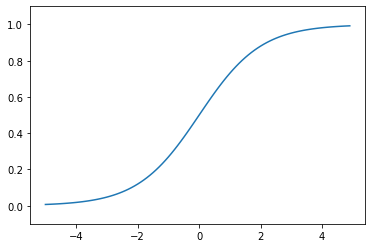

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [5]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# sc
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=111)

In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도, roc 측정
print(accuracy_score(y_test, lr_preds), "정확도")
print(roc_auc_score(y_test, lr_preds), "roc")

0.9766081871345029 정확도
0.9730868075385495 roc


- 종양 관련 데이터 0, 1
- 1이면 종양, 0이면 종양이 아닌 것
- 1이 스팸, 0이 스팸이 아니다.
- 데이터에 따라 본인이 정해서 정답 라벨링 하시면 된다.

- LogisticRegression에서 제공하는 파라미터들
- penalty, l1_ratio, C, Class_weight, solver, max_iter, n_jobs
- 규제가 들어간다.
- penalty : 회귀계수에 대해서 l1, l2, 엘라스틱넷까지 지정할 수 있다.
- l1_ratio : 엘라스틱넷을 사용하면 지정해주면 된다.
- C : 규제의 강도를 조절하는 파라미터 0.01 ... 10, 100
- solver : 결국엔 로지스틱도 정답을 맞추기 위해서 비용, 손실 함수를 최소화하는 것. 최소화하기 위한 최적화 문제 푸는 방법 지정
- 지역해, 전역해


- solver 파라미터에서도 lbfgs, liblinear, newton-cg, sag, saga ... 최신 나온 것들까지 확인해보기
- lbfgs : 디폴트 값
- liblinear : 작은 데이터 셋에서 좋은 성능을 발휘한다.
- newton-cg : 최적화하기 위해서 전체를 다 검색해보면서 대용량으로 접근한다.
- sag : 경사하강법 최적화 하기 위해 진행
- saga : 경사하강법인데 l1 정규화 가능하게 해준다.

- max_iter : solver 진행하는 반복 횟수

### 필수과제 1
- sklearn 공식 홈페이지에 보면 파라미터들에 대한 자세한 설명이 있다.
- 파라미터들 개념 정리 진행해 주세요.
- 제가 적은 것도 좀 더 디테일하게 잡아주시고, 추가적인 것들도 체크해서 넣어주세요.

In [11]:
solvers = ["lbfgs", "liblinear", "newton-cg", "sag", "saga"]

for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=500)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    print("solver : {0}, accuracy : {1:.3f}, roc_auc : {2:.3f}".format(solver, accuracy_score(y_test, lr_preds), 
                                                                       roc_auc_score(y_test, lr_preds)))

solver : lbfgs, accuracy : 0.977, roc_auc : 0.973
solver : liblinear, accuracy : 0.977, roc_auc : 0.973
solver : newton-cg, accuracy : 0.977, roc_auc : 0.973
solver : sag, accuracy : 0.977, roc_auc : 0.973
solver : saga, accuracy : 0.977, roc_auc : 0.973


### 그리드서치를 통해 최적의 하이퍼파라미터 찾기

In [12]:
from sklearn.model_selection import GridSearchCV

def log_tunning(train, y, params):
    lr_clf = LogisticRegression(random_state=111)
    grid = GridSearchCV(lr_clf, params, scoring="roc_auc", cv=7)
    grid.fit(train, y)
    
    print(grid.best_params_)
    print(grid.best_score_)
    
    return grid.best_estimator_

In [13]:
# 파라미터 하나씩 정의해보기 (1)
param1 = {"penalty":["l2","l1"], "C":[0.01, 0.1, 1, 5, 10, 100], "max_iter":[100, 500]}
log_tunning(X_train, y_train, params=param1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
0.9958251618965904


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
84 fits failed out of a total of 168.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

LogisticRegression(C=0.1, random_state=111)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
0.9958251618965904

In [14]:
# 파라미터 하나씩 정의해보기 (2)
param2 = {"penalty":["l2"], "C":[0.1, 0.2, 0.3, 0.4, 0.5, 1, 5, 10], "max_iter":[100, 200, 300, 400, 500, 700]}
log_tunning(X_train, y_train, params=param2)

{'C': 0.5, 'max_iter': 100, 'penalty': 'l2'}
0.9967781557067271


LogisticRegression(C=0.5, random_state=111)

In [17]:
model = log_tunning(X_train, y_train, params=param2)
y_pred = model.predict_proba(X_test)

{'C': 0.5, 'max_iter': 100, 'penalty': 'l2'}
0.9967781557067271


In [18]:
y_pred

array([[7.10381018e-04, 9.99289619e-01],
       [3.43808838e-04, 9.99656191e-01],
       [4.82892191e-03, 9.95171078e-01],
       [1.92332808e-01, 8.07667192e-01],
       [4.90231121e-04, 9.99509769e-01],
       [9.99976816e-01, 2.31840973e-05],
       [2.07757937e-01, 7.92242063e-01],
       [7.50657439e-01, 2.49342561e-01],
       [2.39797234e-02, 9.76020277e-01],
       [9.98376889e-01, 1.62311100e-03],
       [9.88289488e-01, 1.17105116e-02],
       [4.44696113e-01, 5.55303887e-01],
       [1.11252860e-03, 9.98887471e-01],
       [3.60219184e-04, 9.99639781e-01],
       [1.52044569e-03, 9.98479554e-01],
       [9.99958996e-01, 4.10042882e-05],
       [6.22466979e-03, 9.93775330e-01],
       [9.86332422e-01, 1.36675776e-02],
       [5.21628097e-04, 9.99478372e-01],
       [2.79693354e-04, 9.99720307e-01],
       [3.64867902e-02, 9.63513210e-01],
       [9.99999717e-01, 2.83153562e-07],
       [2.18979327e-02, 9.78102067e-01],
       [1.41305330e-03, 9.98586947e-01],
       [1.254306

- 로지스틱 회귀의 경우는 가장 대표적인 이진 분류 사용
- 한 번은 꼭 해보시고, 이렇게 이뤄지고 이런 식으로 값이 도출이 된다라는 것을 필수적으로 이해해주시면 좋다.

### 필수과제 2
- 이진 분류할 데이터를 공유할 예정
- 해당 데이터를 가지고 필수과제 1에서 서칭한 파라미터들을 튜닝하면서 모델링을 진행해주세요!
- 데이터 전처리를 진행해야합니다.
- 데이터 전처리 방식도 정리해서 올려주셔야 합니다.
- 실제 데이터 전처리를 최소 2~3개 정도 다르게 진행해 보시면서 (변수를 빼거나 할 수 있음)
- 실제 값이 얼마나 차이가 나는지 확인해주세요!
- 다음 시간에 랜덤으로 또 발표를 진행할 예정 (랜덤 발표가 어려운 경우는 우수학회원이 어렵다.)